<ipython-input-9-8699f06eade6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_chron['Daily_Mean_Price'] = (stock_data_chron['High'] + stock_data_chron['Low']) / 2
<ipython-input-9-8699f06eade6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_chron[f'Mean_Price_D-{i}'] = stock_data_chron['Daily_Mean_Price'].shift(i)
<ipython-input-9-8699f06eade6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

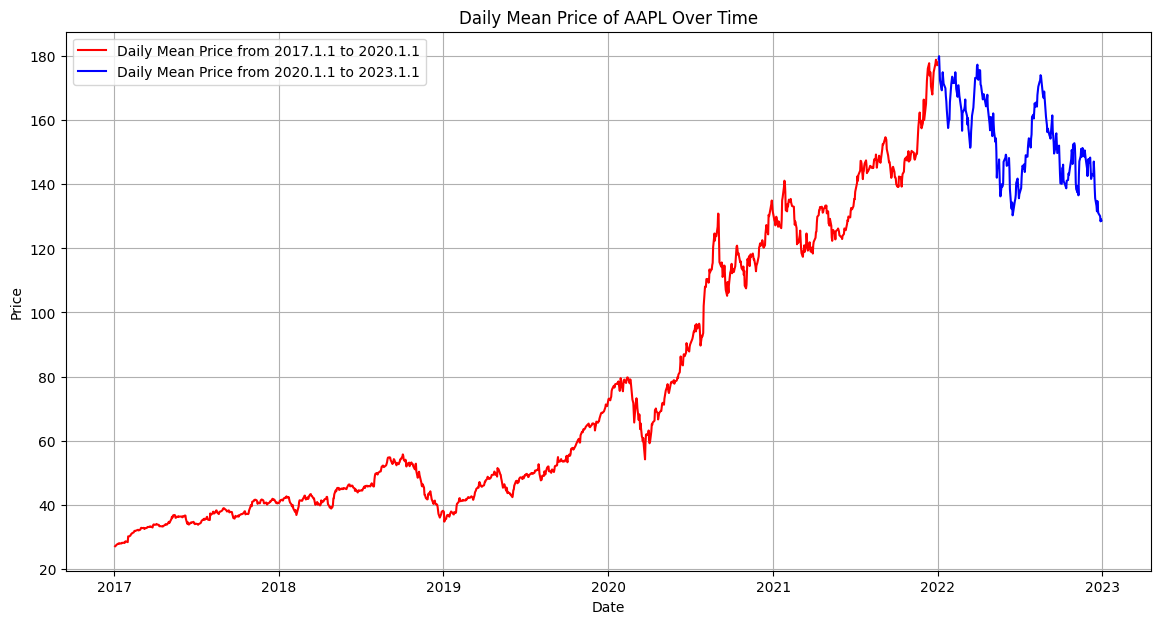

In [9]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

stock_symbol = 'AAPL'

### Train data
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 1, 1)
stock_data = web.DataReader(stock_symbol, 'stooq', start_date, end_date)
stock_data_chron = stock_data[::-1]
stock_data_chron['Daily_Mean_Price'] = (stock_data_chron['High'] + stock_data_chron['Low']) / 2
# last one week data are used to predict the current value
p = 7
for i in range(1, p+1):
  stock_data_chron[f'Mean_Price_D-{i}'] = stock_data_chron['Daily_Mean_Price'].shift(i)
stock_data_chron[:p+1]
stock_data_chron_nona = stock_data_chron.dropna()
features = [f'Mean_Price_D-{i}' for i in range(1, p+1)]
X_train = stock_data_chron_nona[features]
y_train = stock_data_chron_nona['Daily_Mean_Price']

### Test data
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)
stock_test_data = web.DataReader(stock_symbol, 'stooq', start_date, end_date)
stock_test_data_chron = stock_test_data[::-1]
stock_test_data_chron['Daily_Mean_Price'] = (stock_test_data_chron['High'] + stock_test_data_chron['Low']) / 2
# Create the shifted columns for the past k days' mean prices
for i in range(1, p + 1):
  stock_test_data_chron[f'Mean_Price_D-{i}'] = stock_test_data_chron['Daily_Mean_Price'].shift(i)
stock_test_data_chron_nona = stock_test_data_chron.dropna()
X_test = stock_test_data_chron_nona[features]
y_test = stock_test_data_chron_nona['Daily_Mean_Price']

## Display Daily Mean price of AAPL Over Time
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(stock_data_chron.index, stock_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2017.1.1 to 2020.1.1', color='r')
plt.plot(stock_test_data_chron.index, stock_test_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2020.1.1 to 2023.1.1', color='b')
plt.title(f'Daily Mean Price of {stock_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Data Preprocessing
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(7)

X_train_np = np.array(X_train).reshape(X_train.shape[0], 7, 1)
y_train_np = np.array(y_train).reshape(y_train.shape[0], 1)

print(X_train_np.shape)
print(y_train_np.shape)

(1252, 7, 1)
(1252, 1)


In [6]:
# Design model
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten

model_CNN = Sequential()
input_shape = (7, 1)
model_CNN.add(Conv1D(32, kernel_size=1, strides = 3, padding='same', activation='ReLU', input_shape= input_shape))
model_CNN.add(Conv1D(32, kernel_size=1, strides = 2, padding='same', activation='ReLU'))
model_CNN.add(Conv1D(4, kernel_size=1, strides = 2, padding='same', activation='ReLU'))
model_CNN.add(Flatten())
model_CNN.add(Dense(256, activation='ReLU'))
model_CNN.add(Dense(1, activation='linear'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             64        
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1056      
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 4)              132       
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2789 (10.89 KB)
Trainable params: 2789 (10

Epoch 1/20
40/40 [==============================] - 4s 7ms/step - loss: 2538.3604
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 49.4252
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 2.6996
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 1.8360
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 1.8174
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 1.8330
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 1.8244
Epoch 8/20
40/40 [==============================] - 0s 5ms/step - loss: 1.8961
Epoch 9/20
40/40 [==============================] - 0s 5ms/step - loss: 1.8442
Epoch 10/20
40/40 [==============================] - 0s 6ms/step - loss: 1.8350
Epoch 11/20
40/40 [==============================] - 0s 5ms/step - loss: 1.8580
Epoch 12/20
40/40 [==============================] - 0s 5ms/step - loss: 1.8220
Epoch 13/20
40/40 [==========================

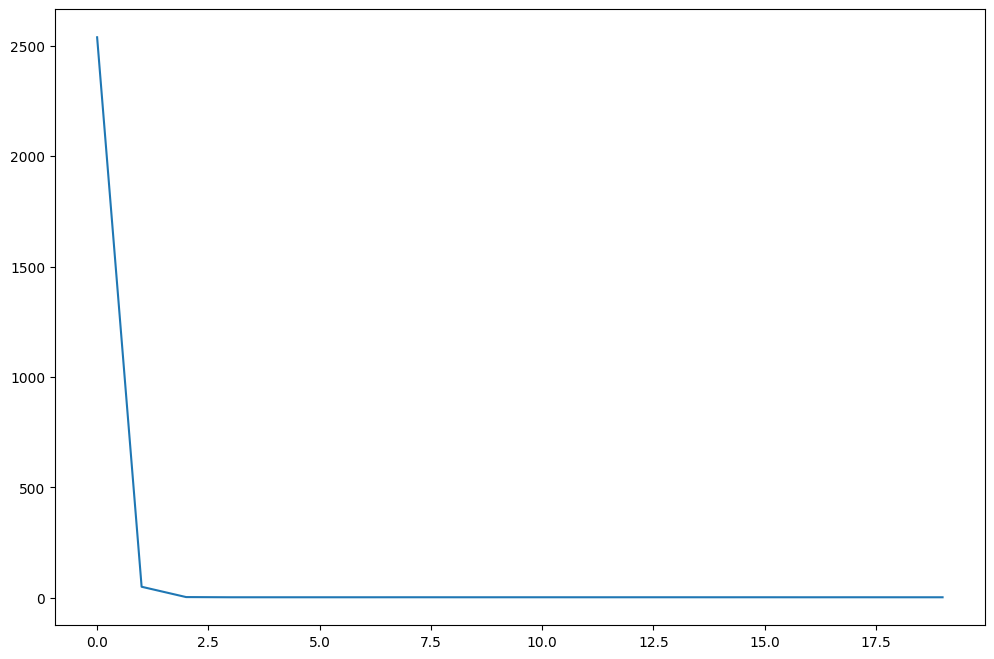

In [7]:
## Train model
epochs = 20
model_CNN.compile(loss='mse', optimizer='adam')
hist = model_CNN.fit(X_train_np, y_train_np, epochs=epochs, verbose=1)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.show()

8/8 [==============================] - 0s 4ms/step


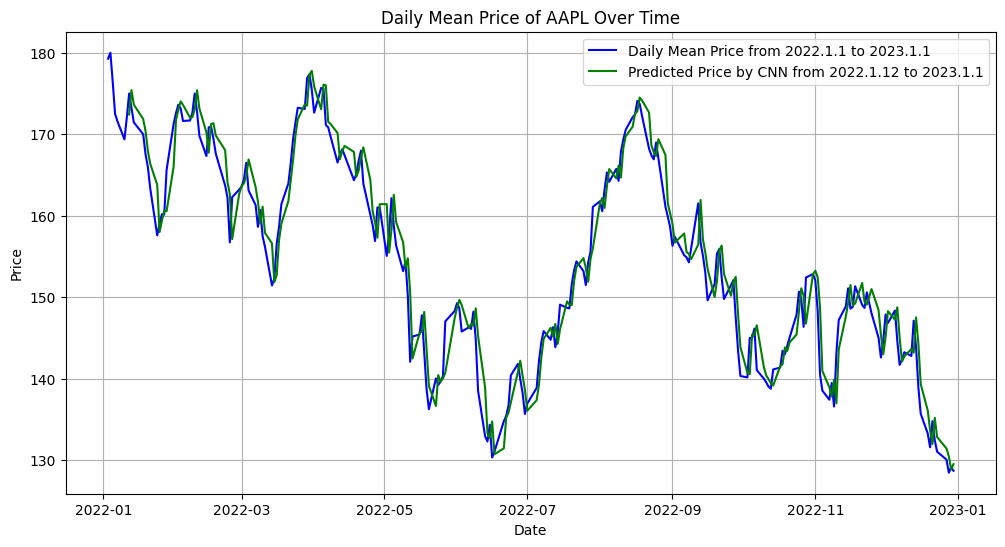

In [11]:
## Test model
X_test_np = np.array(X_test).reshape(X_test.shape[0], 7, 1)
y_test_np = np.array(y_test).reshape(y_test.shape[0], 1)
y_pred_CNN = model_CNN.predict(X_test_np)
plt.figure(figsize=(12, 6))
plt.plot(stock_test_data_chron.index, stock_test_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2022.1.1 to 2023.1.1', color='b')
plt.plot(y_test.index, y_pred_CNN, label='Predicted Price by CNN from 2022.1.12 to 2023.1.1', color='g')
plt.title(f'Daily Mean Price of {stock_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

0 : 1000


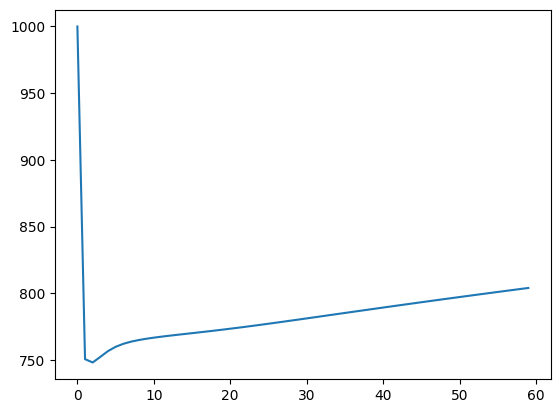

In [13]:
## Show final capital
final_capital_history = [1000]
for n in range(1, 60):
  initial_money = 1000
  available_money = initial_money
  stocks_owned = 0
  previous_day_price = stock_test_data_chron['Daily_Mean_Price'][p-1]
  capital_history = [initial_money]
  for predicted_price, actual_price in zip(y_pred_CNN, stock_test_data_chron['Daily_Mean_Price'][p:]):
    if predicted_price > previous_day_price:
      # Buy stocks with half of the available money at the actual price of the previous day
      stocks_owned += (available_money/n) / previous_day_price
      available_money = available_money*(n-1)/n # All money is used to buy stocks
    elif predicted_price < previous_day_price:
      # Sell half stocks at the actual price of the previous day
      available_money += (stocks_owned/n) * previous_day_price
      stocks_owned = stocks_owned*(n-1)/n # All stocks are sold
    capital_history.append(available_money + stocks_owned*previous_day_price)
    previous_day_price = actual_price # Update the previous day's price for the next iteration
  final_capital_history.append(capital_history[-1])

max_capital = max(final_capital_history)
print(final_capital_history.index(max_capital), ":", max_capital)
plt.plot(final_capital_history)